In [1]:
# ==============================================
# K-Means Clustering on California Housing Data
# ==============================================

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#from google.colab import files

In [2]:
# ----------------------------------------------
# Step 2: Upload the CSV file
# ----------------------------------------------
#print("Please upload your californiahousing.csv file")
#uploaded = files.upload()

# Read the uploaded file into a pandas DataFrame
data = pd.read_csv('californiahousing.csv')

# Show first few rows
print("\n Data successfully loaded! Here's what it looks like:")
display(data.head())


 Data successfully loaded! Here's what it looks like:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
# ----------------------------------------------
# Step 3: Handle missing values and categorical data (ocean_proximity)
# ----------------------------------------------
print("\nChecking for missing values...")
print(data.isnull().sum())


Checking for missing values...
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [4]:


# Fill missing numeric values with column means
data = data.fillna(data.mean(numeric_only=True))
print("Missing values handled (filled with column means).")

Missing values handled (filled with column means).


In [5]:
print("\nChecking for missing values...")
print(data.isnull().sum())


Checking for missing values...
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [6]:
#Using drop_first = True
# Encode categorical variable
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
dummy_cols = data_encoded.columns[data_encoded.dtypes == 'bool']
data_encoded[dummy_cols] = data_encoded[dummy_cols].astype(int)

In [7]:
data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [8]:
#Using drop_first = False
# Encode categorical variable
data_encoded_2 = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=False)
dummy_cols = data_encoded_2.columns[data_encoded_2.dtypes == 'bool']
data_encoded_2[dummy_cols] = data_encoded_2[dummy_cols].astype(int)

In [9]:
data_encoded_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [10]:

# Standardization (Z-score normalization)
# z = (x - mean) / std
# x = original value  mean = mean of the column standard deviation of the column
# ----------------------------------------------
# Step 4: Standardize numeric columns
# ----------------------------------------------
scaler = StandardScaler()
numeric_cols = data_encoded.columns  # all numeric columns
data_scaled = scaler.fit_transform(data_encoded)
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_cols)

data_scaled_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,-0.681889,-0.015566,2.830742,-0.384466


In [11]:
# ----------------------------------------------
# Step 5: Split into train and test subsets
# ----------------------------------------------
train_data, test_data = train_test_split(data_scaled_df, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")



Training data shape: (16512, 13)
Testing data shape: (4128, 13)


c:\Users\MuriloFarias\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MuriloFarias\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\MuriloFarias\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MuriloFarias\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\MuriloFarias\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    h

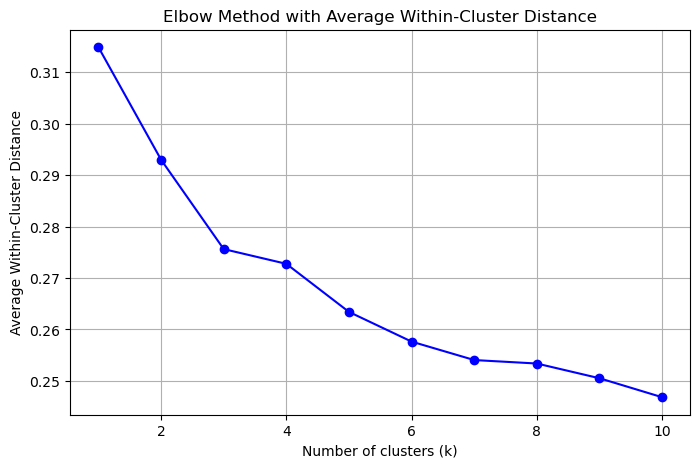

In [12]:
# ----------------------------------------------
# Step 6: Find the optimal number of clusters (Elbow Method)
# ----------------------------------------------
from sklearn.metrics import pairwise_distances

avg_within_distances = []
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)

    # Compute distances from each point to its cluster center
    distances = pairwise_distances(train_data, kmeans.cluster_centers_[kmeans.labels_])

    # Average distance within clusters
    avg_distance = np.mean(distances)

    # Take reciprocal to make elbow upward-sloping
    avg_within_distances.append(1 / avg_distance)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, avg_within_distances, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Distance')
plt.title('Elbow Method with Average Within-Cluster Distance')
plt.grid(True)
plt.show()

In [13]:
# ----------------------------------------------
# Step 7: Choose optimal k (you can pick from the elbow plot)
# ----------------------------------------------
#optimal_k = int(input(" Enter the optimal number of clusters (from the plot): "))

optimal_k = 5 
# Train final KMeans model with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(train_data)

KMeans(n_clusters=5, random_state=42)

In [14]:
# ----------------------------------------------
# Step 8: Test the model on the test dataset
# Evaluate model using silhouette score (ranges between –1 and +1, high values represent good clustering)
# ----------------------------------------------
from sklearn.metrics import silhouette_score

test_clusters = kmeans_final.predict(test_data)

train_silhouette = silhouette_score(train_data, kmeans_final.labels_)
test_silhouette = silhouette_score(test_data, test_clusters)

print("\nModel Evaluation Metrics:")
print(f"Silhouette Score (Train): {train_silhouette:.3f}")
print(f"Silhouette Score (Test):  {test_silhouette:.3f}")


Model Evaluation Metrics:
Silhouette Score (Train): 0.249
Silhouette Score (Test):  0.251


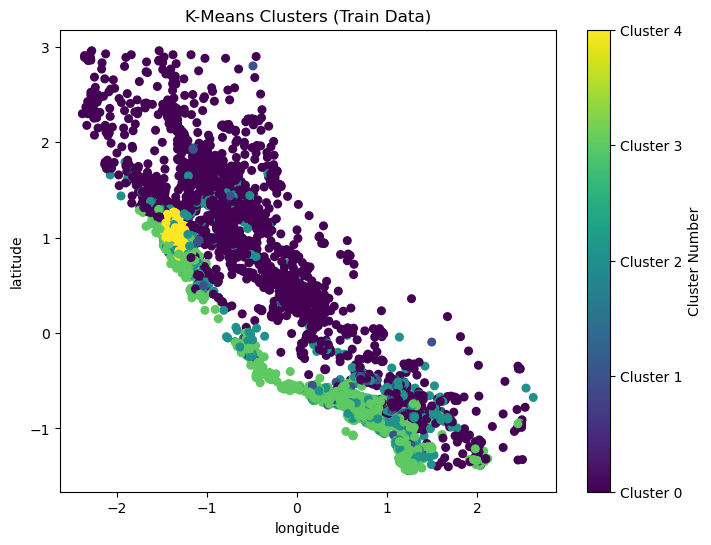

In [15]:
# ----------------------------------------------
# Step 9.1: Visualize clusters of train dataset
# ----------------------------------------------
train_clusters = kmeans_final.predict(train_data)
plt.figure(figsize=(8,6))
scatter = plt.scatter(train_data.iloc[:, 0], train_data.iloc[:, 1], c=train_clusters, cmap='viridis', s=30)
plt.xlabel(train_data.columns[0])
plt.ylabel(train_data.columns[1])
plt.title('K-Means Clusters (Train Data)')

# Create a colorbar / legend showing cluster numbers
cbar = plt.colorbar(scatter, ticks=np.unique(train_clusters))
cbar.set_label('Cluster Number')
cbar.set_ticks(np.unique(train_clusters))
cbar.set_ticklabels([f'Cluster {i}' for i in np.unique(train_clusters)])

plt.show()

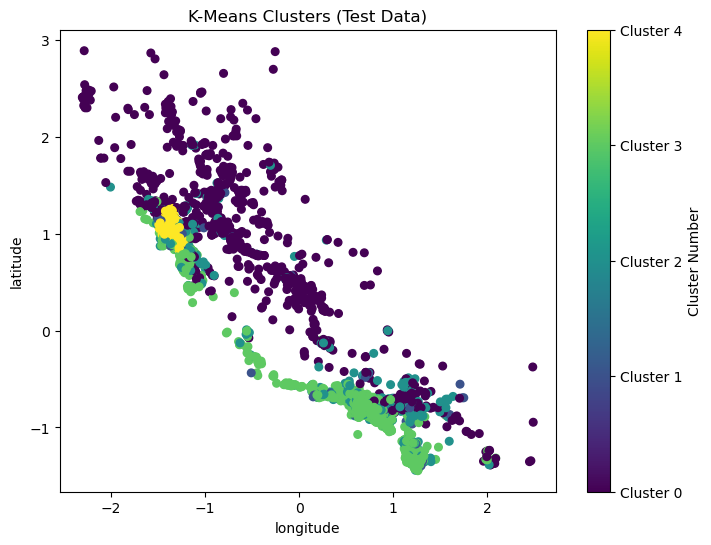

In [16]:
# ----------------------------------------------
# Step 9.2: Visualize clusters of test dataset
# ----------------------------------------------
plt.figure(figsize=(8,6))
scatter = plt.scatter(test_data.iloc[:, 0], test_data.iloc[:, 1], c=test_clusters, cmap='viridis', s=30)
plt.xlabel(test_data.columns[0])
plt.ylabel(test_data.columns[1])
plt.title('K-Means Clusters (Test Data)')

# Create a colorbar / legend showing cluster numbers
cbar = plt.colorbar(scatter, ticks=np.unique(test_clusters))
cbar.set_label('Cluster Number')
cbar.set_ticks(np.unique(test_clusters))
cbar.set_ticklabels([f'Cluster {i}' for i in np.unique(test_clusters)])

plt.show()

In [18]:
# ----------------------------------------------
# Step 10: Add cluster numbers to ORIGINAL data and save to CSV
# ----------------------------------------------

# Encode and scale the full dataset again
data_encoded_full = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
dummy_cols = data_encoded_full.columns[data_encoded_full.dtypes == 'bool']
data_encoded_full[dummy_cols] = data_encoded_full[dummy_cols].astype(int)

# Use same scaler and columns
data_encoded_full = data_encoded_full.reindex(columns=numeric_cols, fill_value=0)
data_scaled_full = scaler.transform(data_encoded_full)

# Predict cluster labels for all rows
data['Cluster'] = kmeans_final.predict(data_scaled_full)

# Save data with cluster assignments
data.to_csv('data_with_clusters.csv', index=False)
#files.download('data_with_clusters.csv')
print("\nData with cluster labels saved as 'data_with_clusters.csv'.")




Data with cluster labels saved as 'data_with_clusters.csv'.


c:\Users\MuriloFarias\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [19]:
# ----------------------------------------------
# Step 11: Cluster Characterization
# ----------------------------------------------
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)
cluster_summary['Count'] = data['Cluster'].value_counts().sort_index().values
cluster_summary = cluster_summary.round(3)

print("\nCluster Characterization (Mean values per cluster):")
display(cluster_summary)

cluster_summary.to_csv('cluster_characterization.csv')
#files.download('cluster_characterization.csv')
print("\nCluster characterization saved as 'cluster_characterization.csv'.")


Cluster Characterization (Mean values per cluster):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Count
Cluster,,,,,,,,,,
0,-120.369,37.280,25.831,1989.715,404.924,1062.048,366.056,3.009,117956.978,5983
1,-118.933,35.136,12.987,12775.686,2451.817,6311.716,2227.886,4.394,215407.884,395
2,-119.003,34.959,19.210,4968.342,1024.200,2671.566,946.877,4.102,223114.155,2982
3,-118.601,34.259,31.894,1944.881,399.211,1117.598,378.832,4.271,246961.487,9071
4,-122.263,37.800,38.411,2260.605,468.588,1118.217,443.818,4.155,259469.123,2209



Cluster characterization saved as 'cluster_characterization.csv'.
